## Exploratory Data Analysis (EDA) for @aradabrand2 Image Data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

# Loading Image Data

In [2]:
# Path to processed images
processed_image_dir = '/processed_images'  # Replace with actual image directory

# Get list of processed image files
image_files = [os.path.join(processed_image_dir, filename) for filename in os.listdir(processed_image_dir) if filename.endswith(('.jpg', '.png'))]

# Check number of images
print(f"Total number of images: {len(image_files)}")

Total number of images: 3794


# Checking Image Statistics

In [3]:
# Check image shape for a few images
sample_image = load_img(image_files[0])
image_array = img_to_array(sample_image)
print(f"Image shape: {image_array.shape}")

Image shape: (224, 224, 3)


# Visualizing Sample Images

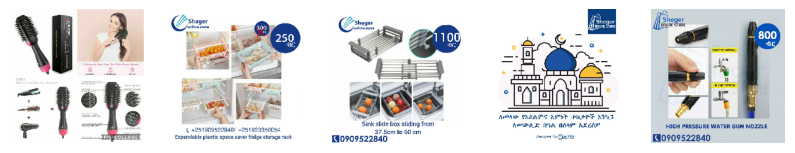

In [4]:
def display_sample_images(image_paths, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        img = load_img(image_paths[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display 5 random images
display_sample_images(image_files[:5])

## Section 1: Image Classification with CNN

Loading and Preprocessing Images

In this subsection, we will load and preprocess images (resize and normalize).

In [5]:
# Function to preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size)
    return img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]

# Load and preprocess images
images = np.array([preprocess_image(img_path) for img_path in image_files])


## Building a Convolutional Neural Network (CNN)

We will build a simple CNN model for image classification.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Adjust number of classes if needed
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

e:\Amharic-NER\nervenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model
Now, we will split the data into training and testing sets, and train the CNN model.

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Dummy labels for illustration (Replace with actual labels)
labels = np.random.randint(0, 2, size=(len(images)))
labels = to_categorical(labels, num_classes=2)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 65s 607ms/step - accuracy: 0.5086 - loss: 0.7873 - val_accuracy: 0.4848 - val_loss: 0.6945
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 56s 591ms/step - accuracy: 0.5247 - loss: 0.6924 - val_accuracy: 0.4941 - val_loss: 0.6950
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 54s 571ms/step - accuracy: 0.5236 - loss: 0.6892 - val_accuracy: 0.4941 - val_loss: 0.7009
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 53s 556ms/step - accuracy: 0.5972 - loss: 0.6534 - val_accuracy: 0.4835 - val_loss: 0.7189
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 53s 562ms/step - accuracy: 0.6647 - loss: 0.6015 - val_accuracy: 0.5033 - val_loss: 0.8258
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 54s 569ms/step - accuracy: 0.6968 - loss: 0.5611 - val_accuracy: 0.5059 - val_loss: 0.8587
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 54s 563ms/step - accuracy: 0.7270 - loss: 0.5133 - val_accuracy: 0.5007 - val_loss: 0.9753
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 55s 579ms/step - accuracy: 0.7760 - loss: 0.4620 - val_accu

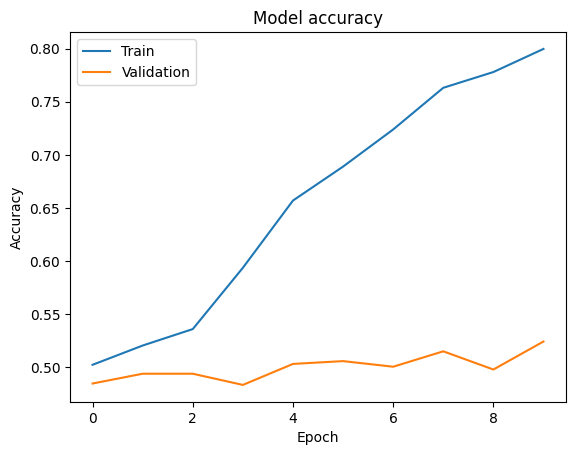

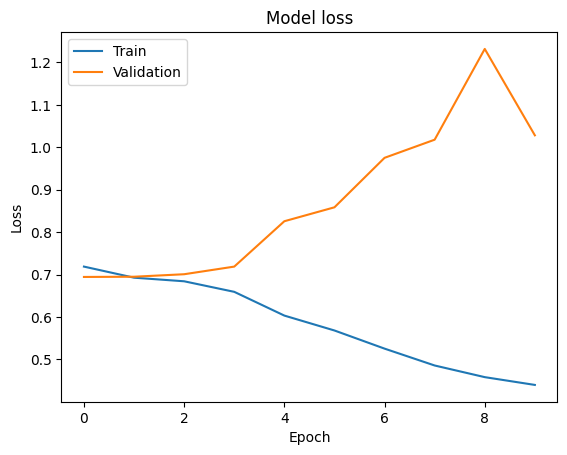

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Evaluating and Displaying Predictions

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.4732 - loss: 1.1049
Test Accuracy: 48.22%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


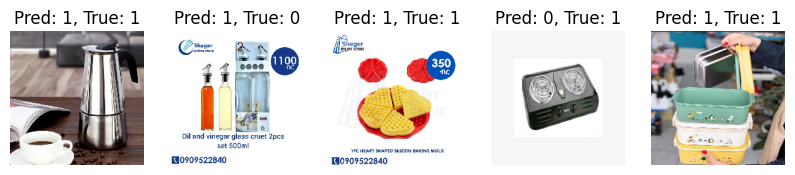

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display predictions on test images
def display_predictions(X, y, model, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i])
        plt.axis('off')
        pred = np.argmax(model.predict(X[i:i+1]), axis=-1)
        true_label = np.argmax(y[i])
        plt.title(f"Pred: {pred[0]}, True: {true_label}")
    plt.show()

# Display predictions on test images
display_predictions(X_test, y_test, model)

## Section 2: Load and Inspect Preprocessed Text Data

Import Necessary Libraries

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [18]:
import os
print(os.getcwd())

e:\Amharic-NER\notebooks


Load and Inspect Preprocessed Text Data

In [19]:
# Load the preprocessed text data from CSV
processed_text_data = 'e:/Amharic-NER/data/processed_text_data.csv'  # Replace with actual path to your preprocessed text data CSV file
df = pd.read_csv(processed_text_data)

# Display the first few rows of the dataframe to check the content
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,689,353,713,33,14,79,281,105,156,14,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Summary of Processed Data

In [ ]:
import sys
sys.path.append('./scripts')

import scripts.text_preprocessing as tp

# Section: Multimodal Learning (Combining Text and Image Data)
Import Necessary Libraries and Modules

In [39]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from transformers import TFAutoModel, AutoTokenizer
from keras.optimizers import Adam

e:\Amharic-NER\nervenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
